This code will apply Single Exponential Smoothing tehcnique to forecast the next few months of Sales based on the past data. 

What is Single Exponential Smoothing Technique? 

Exponential Smoothing method weighs the past observations using exponentially decreasing weights to forecast the future data. 

Simple Equation : 

S(t)=αy(t−1)+(1−α)S(t−1)

α is constant or weight parameter. 

Data at the time t is calculated using alpha constant and previous Smoothed value of time t-1 and Data at time t-1. 



       Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]


<Figure size 1440x1440 with 0 Axes>

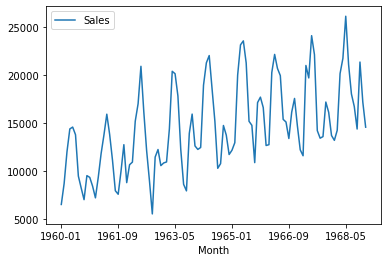

In [109]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from matplotlib import pyplot as plt
from sklearn import model_selection as skl

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)


print(df)

df.index = df['Month']


plt.figure(figsize=(20, 20))
df.plot()
plt.show()

Below code is using Statistics Python method to apply the Simple Exponential Smoothing logic on the input Sales data. 

C:\Users\Aris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


printing forecast
                Month
1969-01  17516.524326
1969-02  17516.524326
1969-03  17516.524326
1969-04  17516.524326
1969-05  17516.524326
1969-06  17516.524326
1969-07  17516.524326
1969-08  17516.524326
1969-09  17516.524326
1969-10  17516.524326
printing fitted value Month
1960-01    11080.666667
1960-02    10174.533333
1960-03     9885.226667
1960-04    10313.381333
1960-05    11129.705067
               ...     
1968-08    19157.892107
1968-09    18670.713686
1968-10    17813.570949
1968-11    18519.256759
1968-12    18251.405407
Length: 108, dtype: float64


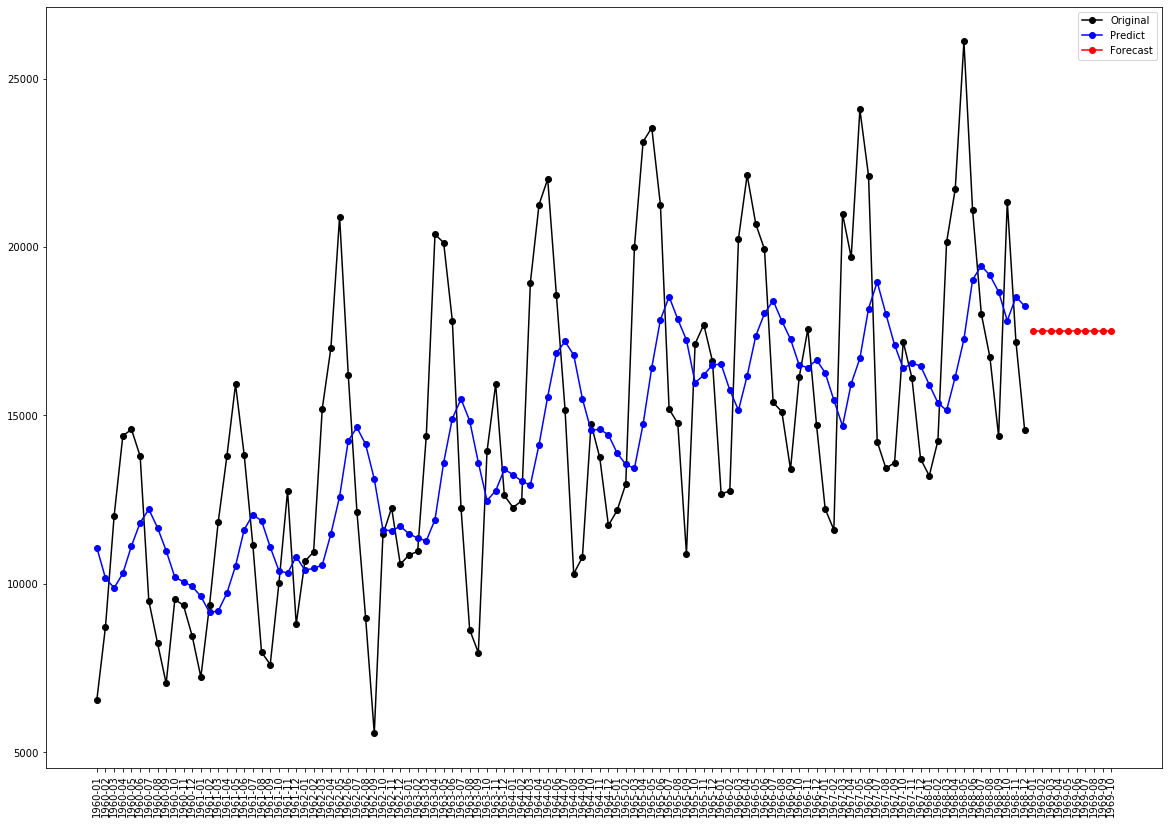

In [112]:


df_series = pd.Series(df['Sales'],df.index)

model = SimpleExpSmoothing(df_series,initialization_method="heuristic")

model_fit = model.fit(smoothing_level=0.2,optimized=False)

yhat = model_fit.forecast(10)

yhat = pd.DataFrame(yhat,columns=['Month'])

df_forecast = pd.DataFrame(yhat)

df_forecast.index = df_forecast.index.astype(str).str.slice(0,7)

print("printing forecast")
print(df_forecast)

print("printing fitted value",model_fit.fittedvalues)

plt.figure(figsize=(20, 14))
x, = plt.plot(df_series, marker='o', color='black')
y, = plt.plot(model_fit.fittedvalues, marker='o', color='blue')
z, = plt.plot(df_forecast,marker='o',color='red')
plt.xticks(rotation = 'vertical')
plt.legend([x,y,z],['Original','Predict','Forecast'])

plt.show()